In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load Data

In [2]:
df = pd.read_excel("Desktop/Tunde/Data Science Course 2020/Cars.xlsx")

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,309
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Improvement 2 - Include Model feature in regression using Mean Encoding 

In [5]:
#Rather than dropping the Model feature, use mean encoding 
#Replace each categories by their mean

In [6]:
pd.set_option('display.max_row', None)

df.Model.value_counts()

E-Class                   199
A6                        172
Vito                      171
Kangoo                    146
Camry                     134
Caddy                     119
X5                        119
T5 (Transporter)          101
Megane                     88
520                        77
Trafic                     77
Land Cruiser Prado         76
Touareg                    69
Passat B6                  66
320                        60
Polo                       60
Q7                         59
Passat B5                  58
A4                         58
C-Class                    54
Lancer                     54
525                        54
Rav 4                      54
Corolla                    54
T4 (Transporter)           53
Lancer X                   52
530                        52
Passat B7                  51
S 500                      51
Jetta                      49
Pajero Wagon               48
Land Cruiser 200           48
X6                         41
S 350     

In [7]:
mean_models = df.groupby('Model')['Price'].mean().to_dict()

In [8]:
df['Model_encoded'] = df['Model'].map(mean_models)

In [9]:
df.head().round(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Model_encoded
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,10161.603
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,10300.000
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,50568.149
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,38698.897
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,18097.224


In [10]:
new_df = df.copy()

In [11]:
new_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Model_encoded
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,10161.603448
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,10300.000000
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,50568.148936
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,38698.896552
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,18097.224314


In [12]:
new_df.drop('Model',axis=1,inplace=True)

In [13]:
new_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,10161.603448
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,10300.000000
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,50568.148936
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,38698.896552
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,18097.224314


In [14]:
new_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4343.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,20346.017458
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,22186.195341
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,1100.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,9281.674609
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,13058.060345
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,20915.833333


### dealing with missing values

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4345 non-null   object 
 1   Price          4173 non-null   float64
 2   Body           4345 non-null   object 
 3   Mileage        4345 non-null   int64  
 4   EngineV        4195 non-null   float64
 5   Engine Type    4345 non-null   object 
 6   Registration   4345 non-null   object 
 7   Year           4345 non-null   int64  
 8   Model_encoded  4343 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 305.6+ KB


In [16]:
new_df.isnull().sum()

Brand              0
Price            172
Body               0
Mileage            0
EngineV          150
Engine Type        0
Registration       0
Year               0
Model_encoded      2
dtype: int64

In [17]:
#Rule of thumb - if you are removing <5% of the observation, you are free to just remove all that have MV

In [18]:
data_no_MV = new_df.dropna()

In [19]:
data_no_MV.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,19493.079631
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,20688.748318
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,1100.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,9281.674609
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,12554.363636
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,20472.310345


### Exploring the PDFs (Probability Distribution Function)

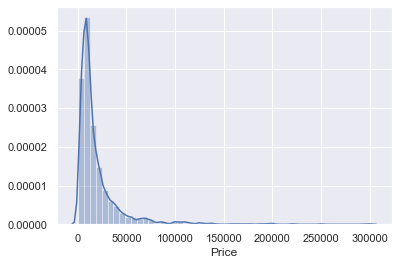

In [20]:
sns.distplot(data_no_MV['Price'])

### Dealing with outliers

In [21]:
data_no_MV['Price'].quantile([1,0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90])

1.00    300000.00
0.99    129812.52
0.98    103999.00
0.97     81639.72
0.96     70000.00
0.95     64820.00
0.94     56500.00
0.93     51500.00
0.92     47316.00
0.91     43983.16
0.90     40996.00
Name: Price, dtype: float64

In [22]:
q = data_no_MV['Price'].quantile(0.99)

data_1= data_no_MV[data_no_MV['Price']<q]

In [23]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,18473.512926
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,17190.812903
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,1100.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,9281.674609
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,11930.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,20000.000000


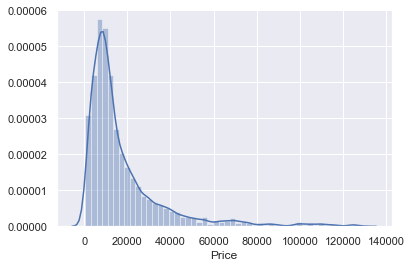

In [24]:
sns.distplot(data_1['Price'])

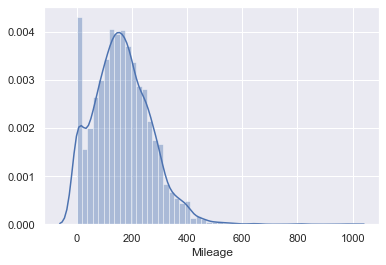

In [25]:
sns.distplot(data_1['Mileage'])

In [26]:
q = data_1['Mileage'].quantile(0.99)

data_2= data_1[data_1['Mileage']<q]

In [27]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,18538.114262
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,17196.103681
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,1100.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,9281.674609
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,12041.666667
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,20064.886364


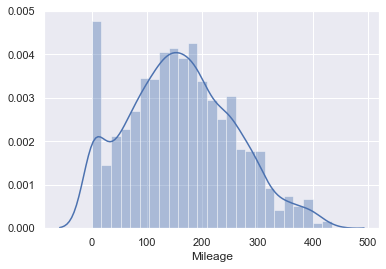

In [28]:
sns.distplot(data_2['Mileage'])

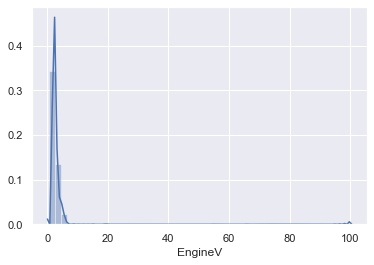

In [29]:
sns.distplot(data_2['EngineV'])

In [30]:
data_3= data_2[data_2['EngineV']<6.5]

In [31]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019,18564.992672
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871,17217.556252
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,1100.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,9281.674609
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,12041.666667
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,20064.886364


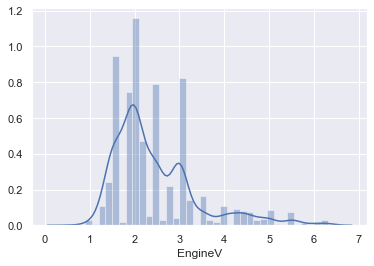

In [32]:
sns.distplot(data_3['EngineV'])

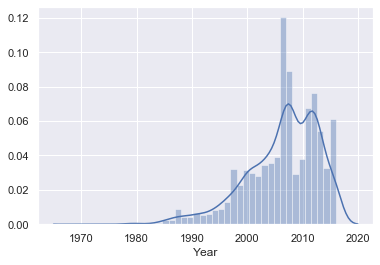

In [33]:
sns.distplot(data_3['Year'])

In [34]:
q = data_3['Year'].quantile(0.01)

data_4= data_3[data_3['Year']>q]

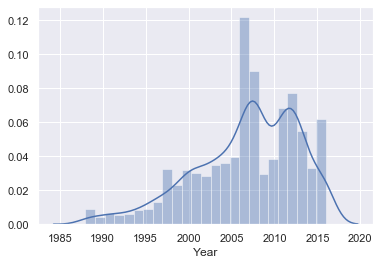

In [35]:
sns.distplot(data_4['Year'])

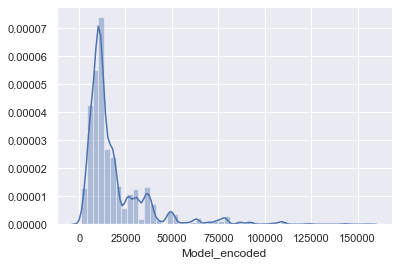

In [36]:
sns.distplot(data_4['Model_encoded'])

In [37]:
data_4['Model_encoded'].quantile([1,0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90])

1.00    155012.833333
0.99     91279.800000
0.98     78492.900000
0.97     69939.900000
0.96     60807.640000
0.95     50568.148936
0.94     48489.945946
0.93     42885.500000
0.92     38857.333333
0.91     38698.896552
0.90     37363.690000
Name: Model_encoded, dtype: float64

In [38]:
q = data_4['Model_encoded'].quantile(0.99)

data_5 = data_4[data_4['Model_encoded'] < q]

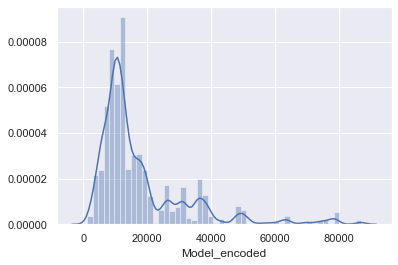

In [39]:
sns.distplot(data_5['Model_encoded'])

In [40]:
data_5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,3826,3826.000000,3826,3826.000000,3826.000000,3826,3826,3826.000000,3826.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1461,NaN,NaN,1780,3464,NaN,NaN
mean,NaN,17482.856275,NaN,161.835337,2.438217,NaN,NaN,2006.640617,17766.521643
std,NaN,17537.269985,NaN,95.041699,0.936216,NaN,NaN,6.079148,14553.127962
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,1200.000000
25%,NaN,7200.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000,9281.674609
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,12041.666667
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000,19772.834416


In [41]:
data_cleaned = data_5.reset_index(drop=True)

In [42]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
count,3826,3826.000000,3826,3826.000000,3826.000000,3826,3826,3826.000000,3826.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1461,NaN,NaN,1780,3464,NaN,NaN
mean,NaN,17482.856275,NaN,161.835337,2.438217,NaN,NaN,2006.640617,17766.521643
std,NaN,17537.269985,NaN,95.041699,0.936216,NaN,NaN,6.079148,14553.127962
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,1200.000000
25%,NaN,7200.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000,9281.674609
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,12041.666667
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000,19772.834416


# Checking the OLS assumptions

Text(0.5, 0, 'Year')

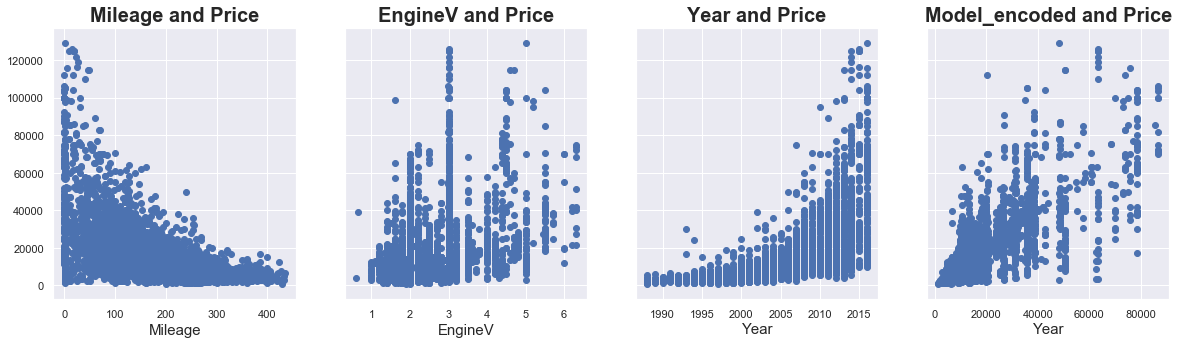

In [43]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5),sharey=True)

ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Mileage and Price',weight='bold',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=15)

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and Price',weight='bold',fontsize=20)
ax2.set_xlabel('EngineV',fontsize=15)

ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Year and Price',weight='bold',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)

ax4.scatter(data_cleaned['Model_encoded'],data_cleaned['Price'])
ax4.set_title('Model_encoded and Price',weight='bold',fontsize=20)
ax4.set_xlabel('Year',fontsize=15)

### Relaxing the assumptions

In [44]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [45]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,10161.603448,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,10300.000000,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,50568.148936,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,38698.896552,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,18097.224314,9.814656


Text(0.5, 0, 'Year')

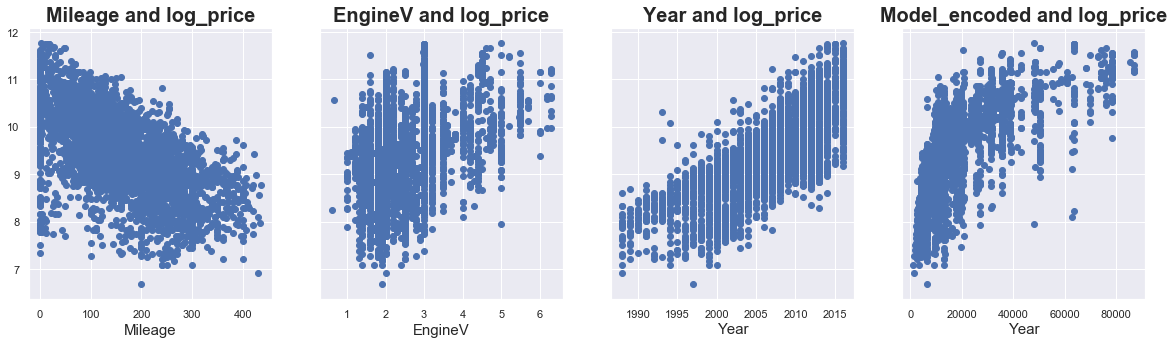

In [46]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5),sharey=True)

ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax1.set_title('Mileage and log_price',weight='bold',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=15)

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('EngineV and log_price',weight='bold',fontsize=20)
ax2.set_xlabel('EngineV',fontsize=15)

ax3.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax3.set_title('Year and log_price',weight='bold',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)

ax4.scatter(data_cleaned['Model_encoded'],data_cleaned['log_price'])
ax4.set_title('Model_encoded and log_price',weight='bold',fontsize=20)
ax4.set_xlabel('Year',fontsize=15)


In [47]:
data_cleaned = data_cleaned.drop('Price',axis=1)

In [48]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,10161.603448,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,10300.000000,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,50568.148936,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,38698.896552,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,18097.224314,9.814656


In [49]:
#Rearrange columns such that the log_price column is moved to the front

In [50]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model_encoded', 'log_price'], dtype=object)

In [51]:
columns = ['log_price','Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model_encoded']

In [52]:
data_cleaned = data_cleaned[columns]

In [53]:
data_cleaned.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,1991,10161.603448
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,10300.000000
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,50568.148936
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,2007,38698.896552
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,2011,18097.224314


# Multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_cleaned[['Mileage','Year','EngineV','Model_encoded']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [55]:
vif

,VIF Factor,features
0,4.769694,Mileage
1,10.547290,Year
2,13.516644,EngineV
3,4.869531,Model_encoded


In [56]:
# Performance improved when i ignored multicollinearity 
# Not sure why?

In [57]:
data_no_multicollinearity = data_cleaned.copy()

In [58]:
data_no_multicollinearity.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_encoded
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,1991,10161.603448
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,10300.000000
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,50568.148936
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,2007,38698.896552
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,2011,18097.224314


# Create dummy variables

In [59]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [60]:
data_with_dummies.head()

,log_price,Mileage,EngineV,Year,Model_encoded,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,10161.603448,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,1999,10300.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,2003,50568.148936,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,2007,38698.896552,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,2011,18097.224314,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [61]:
data_preprocessed = data_with_dummies

# Linear Regression Model

### Declare the input and targets

In [62]:
y = data_preprocessed['log_price']
X = data_preprocessed.drop('log_price',axis=1)

### Scale data

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
x = scaler.transform(X)

In [65]:
# it is usually not recommended to standardise dummy variables
# for ML purposes, scaling has no effect on the predictive power of dummies
# Once scaled though, they loss all thier dummy meaning

### Train_Test_Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Create Linear Regression

In [68]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred = model.predict(x_train)

(6, 12)

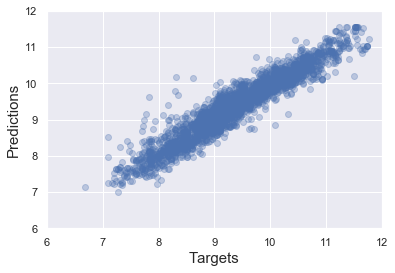

In [70]:
plt.scatter(y_train,y_pred,alpha=0.3)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.xlim(6,12)
plt.ylim(6,12)

Text(0.5, 1.0, 'Residual PDF')

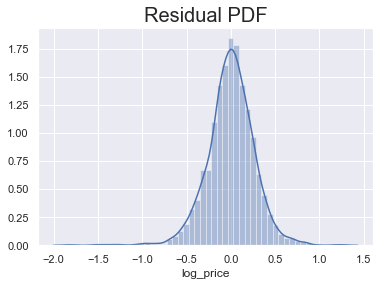

In [71]:
sns.distplot(y_train - y_pred)
plt.title('Residual PDF',size=20)

In [72]:
model.score(x_train,y_train)

0.9020432381447181

### Finding the weights and bias

In [73]:
model.intercept_

9.3965316516299

In [74]:
model.coef_

array([-0.07513122,  0.14153435,  0.46616671,  0.17241835,  0.01898727,
       -0.01736898, -0.10322814, -0.17861451, -0.06052111, -0.09201603,
       -0.05875021, -0.03917283, -0.07742971, -0.05656653, -0.10620965,
       -0.03534621, -0.01483025, -0.057159  ,  0.25559001])

In [75]:
model_summary = DataFrame()
model_summary['Features'] = X.columns.values
model_summary['Weights'] = model.coef_

In [76]:
model_summary

,Features,Weights
0,Mileage,-0.075131
1,EngineV,0.141534
2,Year,0.466167
3,Model_encoded,0.172418
4,Brand_BMW,0.018987
5,Brand_Mercedes-Benz,-0.017369
6,Brand_Mitsubishi,-0.103228
7,Brand_Renault,-0.178615
8,Brand_Toyota,-0.060521
9,Brand_Volkswagen,-0.092016


In [77]:
model_summary.index = model_summary.index + 1
model_summary.loc[0] = ['Intercept',model.intercept_]

In [78]:
model_summary.sort_index()

,Features,Weights
0,Intercept,9.396532
1,Mileage,-0.075131
2,EngineV,0.141534
3,Year,0.466167
4,Model_encoded,0.172418
5,Brand_BMW,0.018987
6,Brand_Mercedes-Benz,-0.017369
7,Brand_Mitsubishi,-0.103228
8,Brand_Renault,-0.178615
9,Brand_Toyota,-0.060521


# Testing

In [79]:
y_test_pred = model.predict(x_test)

(6, 12)

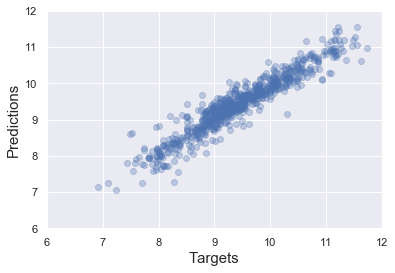

In [80]:
plt.scatter(y_test,y_test_pred,alpha=0.3)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.xlim(6,12)
plt.ylim(6,12)

In [81]:
model.score(x_test,y_test)

0.8993593419742993

In [82]:
df_perf = DataFrame()
df_perf['Prediction'] = np.exp(y_test_pred)
df_perf['Target'] = np.exp(y_test.reset_index(drop=True))
df_perf['Residual'] = df_perf['Target'] - df_perf['Prediction']
df_perf['% Difference'] = np.abs((df_perf['Residual']/df_perf['Target'])*100)

In [83]:
pd.set_option('display.max_rows', None)
df_perf.head().round(2)

,Prediction,Target,Residual,% Difference
0,11789.32,7999.0,-3790.32,47.38
1,2064.67,3100.0,1035.33,33.40
2,3654.90,2900.0,-754.90,26.03
3,6731.76,7500.0,768.24,10.24
4,8609.05,4950.0,-3659.05,73.92


In [84]:
df_perf.describe()

,Prediction,Target,Residual,% Difference
count,766.000000,766.000000,766.000000,766.000000
mean,17080.367464,18113.571501,1033.204037,20.213739
std,14905.728816,17827.493031,7227.337619,21.619264
min,1157.229134,999.000000,-30476.327899,0.048403
25%,8081.726838,7700.000000,-1513.533565,6.752450
50%,12329.546216,11834.475000,-55.449835,14.688795
75%,20841.446915,22000.000000,1779.596818,26.218435
max,104458.881634,125000.000000,70852.971656,206.491034


In [85]:
df_perf.sort_values(by='% Difference')

,Prediction,Target,Residual,% Difference
34,46977.250641,47000.00,22.749359,0.048403
731,11790.251326,11800.00,9.748674,0.082616
411,10881.450491,10900.00,18.549509,0.170179
543,10481.407878,10500.00,18.592122,0.177068
573,35424.523321,35500.00,75.476679,0.212610
39,6777.727297,6800.00,22.272703,0.327540
308,3110.272788,3100.00,-10.272788,0.331380
192,28622.683726,28500.00,-122.683726,0.430469
416,104458.881634,103999.00,-459.881634,0.442198
553,6470.441082,6500.00,29.558918,0.454753
